# Merging Data to Understand the Relationship between Drug Legalization and Violent Crime



In recent years, many US states have decided to legalize the use of marijuana. 

When these ideas were first proposed, there were many theories about the relationship between crime and the "War on Drugs" (the term given to US efforts to arrest drug users and dealers over the past several decades). 

In this exercise, we're going to test a few of those theories using drug arrest data from the state of California. 

Though California has passed a number of laws lessening penalities for marijuana possession over the years, arguably the biggest changes were in  2010, when the state changed the penalty for possessing a small amount of marijuana from a criminal crime to a "civil" penality (meaning those found guilty only had to pay a fine, not go to jail), though possessing, selling, or producing larger quantities remained illegal. Then in 2016, the state fully legalized marijuana for recreational use, not only making possession of small amounts legal, but also creating a regulatory system for producing marijuana for sale. 

Proponents of drug legalization have long argued that the war on drugs contributes to violent crime by creating an opportunity for drug dealers and organized crime to sell and distribute drugs, a business which tends to generate violence when gangs battle over territory. According to this theory, with drug legalization, we should see violent crime decrease after legalization in places where drug arrests had previously been common. 

**To be clear,** this is far from the only argument for drug legalization! It is simply the argument we are well positioned to analyze today. 


## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_merging.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex6_validate_keyword",
    "ex10_merged_successfully",
    "ex16_num_obs",
    "ex17_drug_change",
    "ex18_violent_change",
    "ex21_diffindiff",
    "ex23_diffindiff_proportionate",
}
```


### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.

In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

# Create a results dictionary
results = {}

## Pre-Legalization Analysis

### Exercise 1
We will begin by examining [county-level data on arrests from California in 2009](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca). This data is derived directly from data hosted by the [Office of the California State Attorney General](https://openjustice.doj.ca.gov/data), but please follow the github link above and download and import the file `ca_arrests_2009.csv` (don't try and get it directly from the State Attorney General's office). 

In [2]:
# URL of the dataset ca_arrests_2009.csv
arrest_data = "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/ca/ca_arrests_2009.csv"

# Reading the data from the URL into a pandas DataFrame
arrest = pd.read_csv(arrest_data)

### Exercise 2
Use your data exploration skills to get a feel for this data. If you need to, you can find the [original codebook here](https://github.com/nickeubank/practicaldatascience/blob/master/Example_Data/ca/arrests_codebook.pdf) (This data is a version of that data, but collapsed to one observation per county.)

In [3]:
print(arrest.shape)

(58, 10)


In [4]:
# Print the first five rows of the DataFrame
print("The head of the arrest dataframe is: ")
arrest.head()

The head of the arrest dataframe is: 


,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431
1,1683,Alpine County,8,4,2,1,1,16,83,0
2,1684,Amador County,100,59,101,5,199,464,801,2
3,1685,Butte County,641,602,542,34,429,2248,9026,1
4,1686,Calaveras County,211,83,123,14,70,501,968,3


In [5]:
# basic summary statistics for all numerical columns.
print(
    "The basic summary statistics for all the numerical columns in the arrest datafarme are:"
)
arrest.describe()

The basic summary statistics for all the numerical columns in the arrest datafarme are:


,Unnamed: 0,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1710.500000,2133.827586,2187.775862,2046.275862,142.913793,1531.293103,8042.086207,16727.948276,520.517241
std,16.886879,4937.729079,4949.115636,4591.867960,303.184460,3270.993593,17992.225337,34113.762098,1562.044019
min,1682.000000,8.000000,4.000000,2.000000,1.000000,1.000000,16.000000,83.000000,0.000000
25%,1696.250000,194.000000,141.250000,135.500000,14.000000,146.500000,637.250000,1541.500000,10.500000
50%,1710.500000,536.500000,518.500000,532.000000,39.000000,474.000000,2084.500000,6267.000000,73.000000
75%,1724.750000,2204.000000,2338.750000,1860.500000,117.750000,1993.500000,8677.500000,16417.250000,386.000000
max,1739.000000,35319.000000,34630.000000,32193.000000,2041.000000,23524.000000,127707.000000,238608.000000,11049.000000


In [6]:
# get some random sample of the dataframe
print("The random 5 samples for all the numerical columns in the arrest dataframe are:")
arrest.sample(5)

The random 5 samples for all the numerical columns in the arrest dataframe are:


,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
37,1719,San Francisco County,3629,2792,6867,51,3339,16678,14782,9
40,1722,San Mateo County,1446,1527,1487,97,935,5492,13119,520
23,1705,Merced County,1169,1167,1055,78,1006,4475,9637,714
56,1738,Yolo County,585,634,614,39,662,2534,5426,73
21,1703,Mariposa County,64,40,46,7,43,200,517,21


In [7]:
# information on the total number of entries, the data type of each column, and the number of non-null entries for each column
print(
    "Information on the total number of entries, the data type of each column, and the number of non-null entries for each column in the arrest dataframe are:"
)
arrest.info()

Information on the total number of entries, the data type of each column, and the number of non-null entries for each column in the arrest dataframe are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  58 non-null     int64 
 1   COUNTY      58 non-null     object
 2   VIOLENT     58 non-null     int64 
 3   PROPERTY    58 non-null     int64 
 4   F_DRUGOFF   58 non-null     int64 
 5   F_SEXOFF    58 non-null     int64 
 6   F_ALLOTHER  58 non-null     int64 
 7   F_TOTAL     58 non-null     int64 
 8   M_TOTAL     58 non-null     int64 
 9   S_TOTAL     58 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 4.7+ KB


In [8]:
# Unique Values in Categorical Columns "county"
print(
    "The number of unique values in Categorical Columns 'COUNTY' in the arrest dataframe are:"
)
arrest["COUNTY"].nunique()

The number of unique values in Categorical Columns 'COUNTY' in the arrest dataframe are:


58

In [9]:
print("The unique values in Categorical Columns 'COUNTY' in the arrest dataframe are:")
arrest["COUNTY"].unique()

The unique values in Categorical Columns 'COUNTY' in the arrest dataframe are:


array(['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Sierra County', 'Siskiyou County',
       'Solano 

### Exercise 3
Figuring out what county has the most violent arrests isn't very meaningful if we don't normalize for size. A county with 10 people and 10 arrests for violent crimes is obviously worse than a county with 1,000,000 people an 11 arrests for violent crime. 

To address this, also import `nhgis_county_populations.csv` from [the directory we're working from](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca).

In [2]:
import pandas as pd

# URL of the dataset ca_arrests_2009.csv
population_data = "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/ca/nhgis_county_populations.csv"

# Reading the data from the URL into a pandas DataFrame
population = pd.read_csv(population_data)

### Exercise 4
Use your data exploration skills to get used to this data, and figure out how it relates to your 2009 arrest data. 

In [3]:
print(population.shape)

(6441, 5)


In [4]:
# Print the first five rows of the DataFrame
print("The head of the popultion dataframe is: ")
population.head()
population["YEAR"].unique()

The head of the popultion dataframe is: 


array(['2005-2009', '2013-2017'], dtype=object)

In [13]:
# basic summary statistics for all numerical columns.
print(
    "The basic summary statistics for all the numerical columns in the population datafarme are:"
)
population.describe()

The basic summary statistics for all the numerical columns in the population datafarme are:


,Unnamed: 0,total_population
count,6441.000000,6.441000e+03
mean,1609.750039,9.779149e+04
std,929.750471,3.152470e+05
min,0.000000,7.400000e+01
25%,805.000000,1.119100e+04
50%,1610.000000,2.585000e+04
75%,2415.000000,6.556300e+04
max,3220.000000,1.010572e+07


In [14]:
# get some random sample of the dataframe
print(
    "The random 5 samples for all the numerical columns in the population dataframe are:"
)
population.sample(5)

The random 5 samples for all the numerical columns in the population dataframe are:


,Unnamed: 0,YEAR,STATE,COUNTY,total_population
4521,1300,2013-2017,Michigan,Ottawa County,280243
5036,1815,2013-2017,New Mexico,Quay County,8447
4326,1105,2013-2017,Kentucky,Union County,14915
1221,1221,2005-2009,Massachusetts,Essex County,734889
124,124,2005-2009,Arkansas,Columbia County,24292


In [15]:
# information on the total number of entries, the data type of each column, and the number of non-null entries for each column
print(
    "Information on the total number of entries, the data type of each column, and the number of non-null entries for each column in the population dataframe are:"
)
population.info()

Information on the total number of entries, the data type of each column, and the number of non-null entries for each column in the population dataframe are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        6441 non-null   int64 
 1   YEAR              6441 non-null   object
 2   STATE             6441 non-null   object
 3   COUNTY            6441 non-null   object
 4   total_population  6441 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 251.7+ KB


In [16]:
# Unique Values in Categorical Columns "county"
print(
    "The number of unique values in Categorical Columns 'COUNTY' in the population dataframe are:"
)
population["COUNTY"].unique()

The number of unique values in Categorical Columns 'COUNTY' in the population dataframe are:


1959

In [17]:
print(
    "The unique values in Categorical Columns 'COUNTY' in the population dataframe are:"
)
population["COUNTY"].unique()

The unique values in Categorical Columns 'COUNTY' in the population dataframe are:


array(['Autauga County', 'Baldwin County', 'Barbour County', ...,
       'Petersburg Borough', 'LaSalle Parish', 'Oglala Lakota County'],
      dtype=object)

In [18]:
# Unique Values in Categorical Columns "Year"
print(
    "The number of unique values in Categorical Columns 'YEAR' in the population dataframe are:"
)
population["YEAR"].nunique()

The number of unique values in Categorical Columns 'YEAR' in the population dataframe are:


2

In [19]:
print(
    "The unique values in Categorical Columns 'YEAR' in the population dataframe are:"
)
population["YEAR"].unique()

The unique values in Categorical Columns 'YEAR' in the population dataframe are:


array(['2005-2009', '2013-2017'], dtype=object)

In [20]:
# Since we want to investigate arrest for counties in Califronia in 2009, we need to filter the county and year columns in the population dataframe to include only counties in California from year 2005 ro 2009.
population_filtered = population[
    (population["STATE"] == "California") & (population["YEAR"] == "2005-2009")
]
population_filtered.head()

,Unnamed: 0,YEAR,STATE,COUNTY,total_population
186,186,2005-2009,California,Alameda County,1457095
187,187,2005-2009,California,Alpine County,1153
188,188,2005-2009,California,Amador County,38039
189,189,2005-2009,California,Butte County,217917
190,190,2005-2009,California,Calaveras County,46548


In [21]:
print(population_filtered.shape)

(58, 5)


> + The population dataframe is related to the arrest dataframe as there is one shared column in each DataFrame and that is ‘COUNTY’. 
> + Since I want to investigate arrest for counties in Califronia in 2009, I filtered the county and year columns in the population dataframe to include only counties in California from year 2005 ro 2009.
> + Now the two dataframes are ready to be merged.

### Exercise 5

Once you feel like you have a good sense of the relation between our arrest and population data, merge the two datasets.

In [22]:
print(
    "I want to perform an outer join on the two dataframes arrest and population_filtered on the column 'COUNTY'"
)
merged_outer_1 = pd.merge(arrest, population_filtered, how="outer", on="COUNTY")
merged_outer_1.head()

I want to perform an outer join on the two dataframes arrest and population_filtered on the column 'COUNTY'


,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population
0,1682.0,Alameda County,4318.0,4640.0,5749.0,260.0,3502.0,18469.0,37247.0,431.0,186.0,2005-2009,California,1457095.0
1,1683.0,Alpine County,8.0,4.0,2.0,1.0,1.0,16.0,83.0,0.0,187.0,2005-2009,California,1153.0
2,1684.0,Amador County,100.0,59.0,101.0,5.0,199.0,464.0,801.0,2.0,188.0,2005-2009,California,38039.0
3,1685.0,Butte County,641.0,602.0,542.0,34.0,429.0,2248.0,9026.0,1.0,189.0,2005-2009,California,217917.0
4,1686.0,Calaveras County,211.0,83.0,123.0,14.0,70.0,501.0,968.0,3.0,190.0,2005-2009,California,46548.0


### Exercise 6

When merging data, the result will only be meaningful if your understanding of how the data sets you are merging relate to one another are correct. In some ways, this is obvious — for example, if the variable(s) that you are using to merge observations in the two datasets or to actually identifying observations that should be linked, then obviously merging using those variables will create a meaningless new dataset.

But other properties that matter are often more subtle. For example, it's important to figure out whether your merge is a `1-to-1` merge (meaning there is only one observation of the variable you're merging on in both datasets), a `1-to-many` merge (meaning there is only one observation of the variable you're merging on in the first dataset, but multiple observations in the second), or a `many-to-many` merge (something you almost never do). 

Being correct in your assumptions about these things is *very* important. If you think there's only one observation per value of your merging variable in each dataset, but there are in fact 2, you'll end up with two observations for each value after the merge. Moreover, not only is the structure of your data now a mess, but the fact you were wrong means you didn't understand something about your data. 

So before running a merge, it is critical to answer the following questions:

a) What variable(s) do you think will be consistent across these two datasets you can use for merging? 

b) Do you think there will be exactly 1 observation for each value of this variable(s) in your arrest data?

c) Do you think there will be exactly 1 observation for each value of this variable(s) in your population data?

So in markdown, answer these three questions for this data.


Then also specify the type of merge you were hoping to accomplish as one of the following strings — `"one-to-one"`, `"one-to-many"`, `"many-to-one"`, or `"many-to-many"` — in your `results` dictionary under the key `"ex6_validate_keyword"`. Assume that the first dataset we are talking about (e.g., the `one` in `one-to-many`, if that were your selection) is your arrests data and the second dataset (e.g., the `many` in `one-to-many`, if that were your selection).

In [23]:
# Count occurrences for each unique value in 'COUNTY' column of 'arrest' dataframe
arrest_county_counts = arrest["COUNTY"].value_counts()

# Convert the Series to a DataFrame for a table display
arrest_county_table = pd.DataFrame(arrest_county_counts).reset_index()
arrest_county_table.columns = ["COUNTY", "COUNT"]

# Display the table
arrest_county_table

,COUNTY,COUNT
0,Alameda County,1
1,Santa Cruz County,1
2,Plumas County,1
3,Riverside County,1
4,Sacramento County,1
5,San Benito County,1
6,San Bernardino County,1
7,San Diego County,1
8,San Francisco County,1
9,San Joaquin County,1


In [24]:
# Count occurrences for each unique value in 'COUNTY' column of 'population' dataframe
population_county_counts = population_filtered["COUNTY"].value_counts()

# Convert the Series to a DataFrame for a table display
population_county_table = pd.DataFrame(population_county_counts).reset_index()
population_county_table.columns = ["COUNTY", "COUNT"]

# Display the table
population_county_table

,COUNTY,COUNT
0,Alameda County,1
1,Santa Cruz County,1
2,Plumas County,1
3,Riverside County,1
4,Sacramento County,1
5,San Benito County,1
6,San Bernardino County,1
7,San Diego County,1
8,San Francisco County,1
9,San Joaquin County,1


In [25]:
# Extract unique counties from each dataframe
unique_counties_df1 = set(arrest["COUNTY"].unique())
unique_counties_df2 = set(population_filtered["COUNTY"].unique())

# Check if the unique counties in df1 are also in df2
counties_in_df1_not_in_df2 = unique_counties_df1 - unique_counties_df2

# Check if the unique counties in df2 are also in df1
counties_in_df2_not_in_df1 = unique_counties_df2 - unique_counties_df1

print("Counties in arrest but not in population_filtered:", counties_in_df1_not_in_df2)
print("Counties in population_filtered but not in arrest:", counties_in_df2_not_in_df1)

# To check if they are the same:
if not counties_in_df1_not_in_df2 and not counties_in_df2_not_in_df1:
    print("Both dataframes have the same unique values in the COUNTY column.")
else:
    print("The dataframes have different unique values in the COUNTY column.")

Counties in arrest but not in population_filtered: {'Del Norte County', 'Inyo County'}
Counties in population_filtered but not in arrest: {'Injo County', 'DelNorte County'}
The dataframes have different unique values in the COUNTY column.


> + a) The variable I think will be consistent across these two datasets you can use for merging is "COUNTY".
> + b) I think there are exactly 1 observation for each value of "COUNTY" in my arrest data.
> + c) I think there are exactly 1 observation for each value of "COUNTY" in my population_filtered data.
> + The type of merge I hope to accomplish is one-to-one.

In [26]:
ex6_validate_keyword = "one-to-one"
results["ex6_validate_keyword"] = ex6_validate_keyword
# print(results)

## Merge Validation

Because of the importance of answering these questions accurately, `pandas` provides a utility for *validating* these assumptions when you do a merge: the `validate` keyword! Validate will accept `"1:1"`, `"1:m"`, `"m:1"`, and `"m:m"`. It will then check to make sure your merge matches the type of merge you think it is. I *highly* recommend always using this option (...and not just because I'm the one who added `validate` to pandas).

*Note:* `validate` only actually tests if observations are unique when a `1` is specified; if you do a `1:1` merge but pass `validate="1:m"`, `validate="m:1"`, or `validate="m:m"`, you won't get an error — a one-to-many merge that turns out to be a one-to-one isn't nearly as dangerous as a one-to-one merge that turns out to be one-to-many.

### Exercise 7

Repeat the merge you conducted above, but this time use the `validate` to make sure your assumptions about the data were correct. If you find that you made a mistake, revise your data until the merge you think is correct actually takes place.

To aid the autograder, please make sure to comment out any code that generates an error.



In [27]:
# Attempt the merge with validation
try:
    # The merge is expected to be one-to-many based on the assumptions
    merged_outer_2 = pd.merge(
        arrest, population_filtered, how="outer", on="COUNTY", validate="1:1"
    )
    print("The type of merge is one to one.")
except Exception as e:
    print("The type of merge is not one to one:", e)
    pass

The type of merge is one to one.


### Exercise 8

Were your assumptions about the data correct? If not, what had you (implicitly) assumed when you did your merge in Exercise 5 that turned out not to be correct?

> + My assumptions about the data are correct. It is a "one-to-one" type of merge.
> + In Exercise 6, I checked the observations for each value of the variable "COUNTY" in my arrest dataframe. It turns out there is exactly 1 observation for each value of variable "COUNTY" in my arrest data.
> + In Exercise 6, I checked the observations for each value of the variable "COUNTY" in my population_filtered dataframe. It turns out there is exactly 1 observation for each value of variable "COUNTY" in my population_filtered data.
> + Therefore, I assume that it is a "one-to-one" type of merge. "one" represents there is exactly 1 observation for each value of variable "COUNTY" in my arrest data, "one" represents there is exactly 1 observation for each value of variable "COUNTY" in my population_filtered data.


## Merge Diagnostics

### Exercise 9

Checking whether you are doing a 1-to-1, many-to-1, 1-to-many, or many-to-many merge is only the first type of diagnostic test you should run on *every* merge you conduct. The second test is to see if you data merged successfully!

To help with this, the `merge` function in pandas offers a keyword option called `indicator`. If you set `indicator` to `True`, then pandas will add a column to the result of your merge called `_merge`. This variable will tell you, for each observation in your merged data, whether: 

- that observation came from a successful merge of both datasets, 
- if that observation was in the left dataset (the first one you passed) but not the right dataset (the second one you passed), or 
- if that observation was in the right dataset but not the left. 

This allows you to quickly identify failed merges!

For example, suppose you had the following data:

In [28]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

df1 = pd.DataFrame({"key": ["key1", "key2"], "df1_var": [1, 2]})
df1

,key,df1_var
0,key1,1
1,key2,2


In [29]:
df2 = pd.DataFrame({"key": ["key1", "Key2"], "df2_var": ["a", "b"]})
df2

,key,df2_var
0,key1,a
1,Key2,b


Now suppose you *expected* that all observations should merge when you merge these datasets (because you hadn't noticed the typo in `df2` where `key2` has a capital `Key2`. If you just run a merge, it works without any problems:

In [30]:
new_data = pd.merge(df1, df2, on="key", how="outer")

And so you might carry on in life unaware your data is now corrupted: instead of two merged rows, you now have 3, only 1 of which merged correctly!

In [31]:
new_data

,key,df1_var,df2_var
0,key1,1.0,a
1,key2,2.0,NaN
2,Key2,NaN,b


When what you really wanted was: 

In [32]:
df2_correct = df2.copy()
df2_correct.loc[df2.key == "Key2", "key"] = "key2"
pd.merge(df1, df2_correct, on="key", how="outer")

,key,df1_var,df2_var
0,key1,1,a
1,key2,2,b


(in a small dataset, you'd quickly see you have 1 row instead of 2, but if you have millions of rows, a couple missing won't be evident). 

But now suppose we use the `indicator` function:

In [33]:
new_data = pd.merge(df1, df2, on="key", how="outer", indicator=True)
new_data._merge.value_counts()

_merge
left_only     1
right_only    1
both          1
Name: count, dtype: int64

We could immediately see that only one observation merged correct, and that one row from each dataset failed to merge!

Moreover, we can look at the failed merges:

In [34]:
new_data[new_data._merge != "both"]

,key,df1_var,df2_var,_merge
1,key2,2.0,NaN,left_only
2,Key2,NaN,b,right_only


Allowing us to easily diagnose the problem. 

**Note:** The `pandas` merge function allows users to decide whether to keep only observations that merge (`how='inner'`), all the observations from the first dataset pasted to merge (`how='left'`), all the observations from the second dataset passed to merge (`how='right'`), or all observations (`how='outer'`):

![join_types](https://nickeubank.github.io/practicaldatascience_book/_images/3.4.15_merge_types.png)

But one danger to using the more restrictive options (like the default, `how='inner'`) is that the merge throws away all the observations that fail to merge, and while this may be the *eventual* goal of your analysis, it means that you don't get to see all the observations that failed to merge that maybe you thought *would* merge. In other words, it throws away the errors so you can't look at them!  

So to use `indicator` effectively, you have to:

- Not use `how="inner"`, and
- Check the values of `_merge` after your merge. 

### Exercise 10

Now repeat your previous merge using *both* the `validate` keyword *and* the `indicator` keyword with `how='outer'`. 

How many observations successfully merged (were in both datasets)? Store the result in `results` under the key `"ex10_merged_successfully"`.

In [35]:
merged_outer_3 = pd.merge(
    arrest,
    population_filtered,
    how="outer",
    on="COUNTY",
    validate="1:1",
    indicator=True,
)
merged_outer_3._merge.value_counts()

_merge
both          56
left_only      2
right_only     2
Name: count, dtype: int64

In [36]:
ex10_merged_successfully = 56
print(
    f"{ex10_merged_successfully} observations successfully merged (were in both datasets)."
)
results["ex10_merged_successfully"] = ex10_merged_successfully
# print(results)

56 observations successfully merged (were in both datasets).


### Exercise 11

You *should* be able to get to the point that all counties in our arrest data merge with population data. If that did not happen, can you figure out why that did not happen? Can you fix the data so that all arrest data merges with population data?

In [37]:
merged_outer_3[merged_outer_3._merge != "both"]

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
7,1689.0,Del Norte County,144.0,104.0,79.0,13.0,97.0,437.0,1268.0,5.0,NaN,NaN,NaN,NaN,left_only
13,1695.0,Inyo County,81.0,44.0,39.0,3.0,38.0,205.0,851.0,1.0,NaN,NaN,NaN,NaN,left_only
58,NaN,DelNorte County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,2005-2009,California,28729.0,right_only
59,NaN,Injo County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,2005-2009,California,17438.0,right_only


In [38]:
merged_outer_3[merged_outer_3._merge == "right_only"]

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
58,NaN,DelNorte County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,2005-2009,California,28729.0,right_only
59,NaN,Injo County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,2005-2009,California,17438.0,right_only


In [39]:
merged_outer_3[merged_outer_3._merge == "left_only"]

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
7,1689.0,Del Norte County,144.0,104.0,79.0,13.0,97.0,437.0,1268.0,5.0,NaN,NaN,NaN,NaN,left_only
13,1695.0,Inyo County,81.0,44.0,39.0,3.0,38.0,205.0,851.0,1.0,NaN,NaN,NaN,NaN,left_only


> + 56 observation came from a successful merge of both datasets.
> + 2 observation was in the left dataset arrest but not the right dataset population_filtered: "Del Norte County", "Inyo County".
> + 2 observation was in the right dataset population_filtered but not the left dataset arrest: "DelNorte County", "Injo County".
> + The merge for all counties in our arrest data with population data did not happen because of space errors and name typos in the county column.
> + In order to fix it, I changed the name of "DelNorte County" to "Del Norte County" and "Injo County" to "Inyo County" in the population_filtered data.
> + After the fix, the 58 observations in these two dataframe successully merged.

In [40]:
population_filtered.loc[
    population_filtered.COUNTY == "DelNorte County", "COUNTY"
] = "Del Norte County"
population_filtered.loc[
    population_filtered.COUNTY == "Injo County", "COUNTY"
] = "Inyo County"

# conduct merging again
merged_outer_4 = pd.merge(
    arrest, population_filtered, how="outer", on="COUNTY", indicator=True
)
# check the merge status
merged_outer_4._merge.value_counts()

_merge
both          58
left_only      0
right_only     0
Name: count, dtype: int64

In [41]:
merged_outer_4.head()

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431,186,2005-2009,California,1457095,both
1,1683,Alpine County,8,4,2,1,1,16,83,0,187,2005-2009,California,1153,both
2,1684,Amador County,100,59,101,5,199,464,801,2,188,2005-2009,California,38039,both
3,1685,Butte County,641,602,542,34,429,2248,9026,1,189,2005-2009,California,217917,both
4,1686,Calaveras County,211,83,123,14,70,501,968,3,190,2005-2009,California,46548,both


## Comparing Arrest Rates

### Exercise 12

Now that we have arrest counts and population data, we can calculate arrest *rates*. For each county, create a new variable called `violent_arrest_rate_2009` that is the number of violent arrests for 2009 divided by the population of the county from 2005-2009, and a similar new variable called `drug_arrest_rate_2009` for drug arrests divided by population.

In [42]:
# Calculate violent arrest rate for 2009
merged_outer_4["violent_arrest_rate_2009"] = (
    merged_outer_4["VIOLENT"] / merged_outer_4["total_population"]
)


# Calculate drug arrest rate for 2009
merged_outer_4["drug_arrest_rate_2009"] = (
    merged_outer_4["F_DRUGOFF"] / merged_outer_4["total_population"]
)

merged_outer_4[["COUNTY", "violent_arrest_rate_2009", "drug_arrest_rate_2009"]].head()

,COUNTY,violent_arrest_rate_2009,drug_arrest_rate_2009
0,Alameda County,0.002963,0.003946
1,Alpine County,0.006938,0.001735
2,Amador County,0.002629,0.002655
3,Butte County,0.002941,0.002487
4,Calaveras County,0.004533,0.002642


### Exercise 13

Make a scatter plot that shows the relationship between each county's violent arrest rate and it's drug arrest rate. Since we haven't done a lot with plotting yet, feel free to plot in whatever manner feels most comfortable. The easiest, if you're unsure, is just to use the `pandas` inbuilt `.plot()` method. Just specify the `x` keyword with your x-axis variable, the `y` keyword with your y-axis variable, and use `kind="scatter"`.

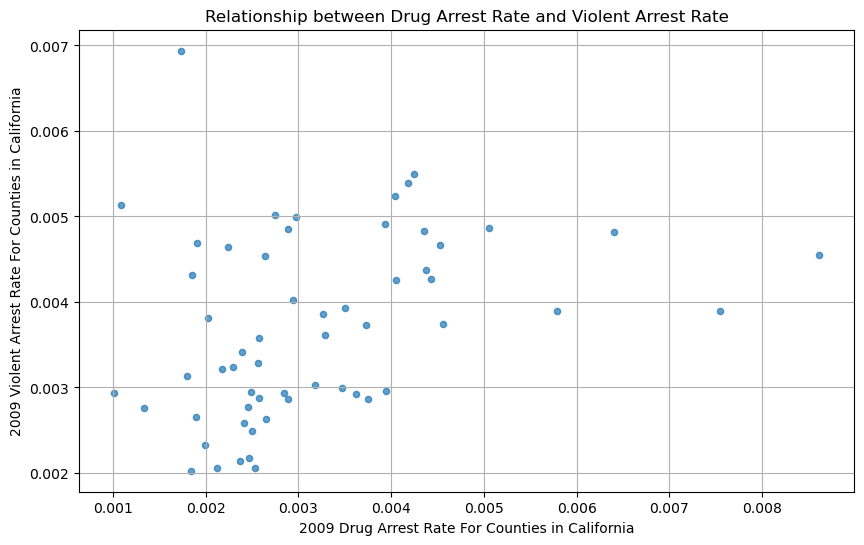

In [43]:
import matplotlib.pyplot as plt

# Using pandas built-in plot
merged_outer_4.plot(
    x="drug_arrest_rate_2009",
    y="violent_arrest_rate_2009",
    kind="scatter",
    figsize=(10, 6),
    alpha=0.7,
)

plt.title("Relationship between Drug Arrest Rate and Violent Arrest Rate")
plt.xlabel("2009 Drug Arrest Rate For Counties in California")
plt.ylabel("2009 Violent Arrest Rate For Counties in California")
plt.grid(True)
plt.show()

### Exercise 14

Based on this simple comparison of 2009 violent arrest rates and drug arrest rates, what might you conclude about the relationship between the illegal drug trade and violent crime?

> + Based on this simple comparison of 2009 drug arrest rates and violent arrest rates, it seems there is a positive correlation between the number of illegal drug trade and the number of violent crime.
> + In other words, as the number of illegal drug trade increases, the number of violent crime increases as well.

## Comparing with 2018 Arrests

The preceding analysis can tell us about whether violent crime and the drug trade are correlated, but it doesn't tell us much about whether they are *causally* related. It *could* be the case that people dealing drugs *cause* more violent crime, but it could also be that certain communities, for some other reason, tend to have *both* more drug sales *and* more violent crime. 

To help answer this question, let's examine whether violent crime arrest rates changed in response to drug legalization. In particular, let's do this by comparing violent crime arrest rates in 2009 (before drug legalization) to violent crime arrest rates in 2018 (after drug legalization). If the illegal drug trade causes violent crime, then we would expect the violent crime rate to fall in response to drug legalization.


### Exercise 15

Just as we created violent arrest rates and drug arrest rates for 2009, now we want to do it for 2018. Using the data on 2018 arrests (also in the [same repository](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca) we used before) and the same dataset of population data (you'll have to use population from 2013-2017, as 2018 population data has yet to be released), create a dataset of arrest rates. 

As before, *be careful with your merges!!!*

In [44]:
# Read in the 2018 arrest data from the URL
arrest_18 = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/ca/ca_arrests_2018.csv"
)

arrest_18.head()

,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,2204,Alameda County,4132,3051,1062,173,2619,11037,28305,82
1,2205,Alpine County,5,2,1,0,3,11,41,0
2,2206,Amador County,72,40,31,3,142,288,701,1
3,2207,Butte County,785,437,229,47,741,2239,8853,1
4,2208,Calaveras County,147,42,29,6,96,320,897,0


In [45]:
print(arrest_18.shape)

(58, 10)


In [46]:
# filter population to include only counties in  California from year 2013 to 2017
population_18 = population[
    (population.YEAR == "2013-2017") & (population.STATE == "California")
]
population_18.head()

,Unnamed: 0,YEAR,STATE,COUNTY,total_population
3407,186,2013-2017,California,Alameda County,1629615
3408,187,2013-2017,California,Alpine County,1203
3409,188,2013-2017,California,Amador County,37306
3410,189,2013-2017,California,Butte County,225207
3411,190,2013-2017,California,Calaveras County,45057


In [47]:
print(population_18.shape)

(58, 5)


In [48]:
# attempt to merge the two dataframes
merged_outer_5 = pd.merge(
    arrest_18,
    population_18,
    how="outer",
    on="COUNTY",
    validate="1:1",
    indicator=True,
)
merged_outer_5._merge.value_counts()

_merge
both          56
left_only      2
right_only     2
Name: count, dtype: int64

In [49]:
# check merge error
merged_outer_5[merged_outer_5._merge != "both"]

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
7,2211.0,Del Norte County,151.0,65.0,43.0,7.0,89.0,355.0,1525.0,0.0,NaN,NaN,NaN,NaN,left_only
13,2217.0,Inyo County,107.0,28.0,13.0,0.0,101.0,249.0,653.0,0.0,NaN,NaN,NaN,NaN,left_only
58,NaN,DelNorte County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,2013-2017,California,27442.0,right_only
59,NaN,Injo County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,2013-2017,California,18195.0,right_only


In [50]:
# clean data and merge again
population_18.loc[
    population_18.COUNTY == "DelNorte County", "COUNTY"
] = "Del Norte County"
population_18.loc[population_18.COUNTY == "Injo County", "COUNTY"] = "Inyo County"

# conduct merging again
merged_18 = pd.merge(arrest_18, population_18, how="outer", on="COUNTY", indicator=True)
# check the merge status
merged_18._merge.value_counts()

_merge
both          58
left_only      0
right_only     0
Name: count, dtype: int64

In [51]:
# Calculate violent arrest rate for 2018
merged_18["violent_arrest_rate_2018"] = (
    merged_18["VIOLENT"] / merged_18["total_population"]
)


# Calculate drug arrest rate for 2009
merged_18["drug_arrest_rate_2018"] = (
    merged_18["F_DRUGOFF"] / merged_18["total_population"]
)

merged_18[["COUNTY", "violent_arrest_rate_2018", "drug_arrest_rate_2018"]].head()

,COUNTY,violent_arrest_rate_2018,drug_arrest_rate_2018
0,Alameda County,0.002536,0.000652
1,Alpine County,0.004156,0.000831
2,Amador County,0.001930,0.000831
3,Butte County,0.003486,0.001017
4,Calaveras County,0.003263,0.000644


### Exercise 16

Now merge our two county-level datasets so you have one row for every county, and variables for violent arrest rates in 2018, violent arrest rates in 2009, felony drug arrest rates in 2018, and felony drug arrest rates in 2009. Store the number of observations in your final data set in your `results` dictionary under the key `"ex16_num_obs"`.

In [52]:
merged_18.head()

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge,violent_arrest_rate_2018,drug_arrest_rate_2018
0,2204,Alameda County,4132,3051,1062,173,2619,11037,28305,82,186,2013-2017,California,1629615,both,0.002536,0.000652
1,2205,Alpine County,5,2,1,0,3,11,41,0,187,2013-2017,California,1203,both,0.004156,0.000831
2,2206,Amador County,72,40,31,3,142,288,701,1,188,2013-2017,California,37306,both,0.001930,0.000831
3,2207,Butte County,785,437,229,47,741,2239,8853,1,189,2013-2017,California,225207,both,0.003486,0.001017
4,2208,Calaveras County,147,42,29,6,96,320,897,0,190,2013-2017,California,45057,both,0.003263,0.000644


In [53]:
merged_outer_4.head()

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge,violent_arrest_rate_2009,drug_arrest_rate_2009
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431,186,2005-2009,California,1457095,both,0.002963,0.003946
1,1683,Alpine County,8,4,2,1,1,16,83,0,187,2005-2009,California,1153,both,0.006938,0.001735
2,1684,Amador County,100,59,101,5,199,464,801,2,188,2005-2009,California,38039,both,0.002629,0.002655
3,1685,Butte County,641,602,542,34,429,2248,9026,1,189,2005-2009,California,217917,both,0.002941,0.002487
4,1686,Calaveras County,211,83,123,14,70,501,968,3,190,2005-2009,California,46548,both,0.004533,0.002642


In [54]:
# merge our two county-level datasets so you have one row for every county, and variables for violent arrest rates in 2018, violent arrest rates in 2009, felony drug arrest rates in 2018, and felony drug arrest rates in 2009
arrest_drug_data = pd.merge(
    merged_outer_4[["COUNTY", "violent_arrest_rate_2009", "drug_arrest_rate_2009"]],
    merged_18[["COUNTY", "violent_arrest_rate_2018", "drug_arrest_rate_2018"]],
    how="outer",
    on="COUNTY",
    indicator=True,
)

arrest_drug_data.value_counts("_merge")

_merge
both          58
left_only      0
right_only     0
Name: count, dtype: int64

In [55]:
num_rows = arrest_drug_data.shape[0]
print(
    f"The number of observations in my final data set arrest_drug_data is {num_rows}."
)

results["ex16_num_obs"] = num_rows
# print(results)

The number of observations in my final data set arrest_drug_data is 58.


In [56]:
arrest_drug_data.head()

,COUNTY,violent_arrest_rate_2009,drug_arrest_rate_2009,violent_arrest_rate_2018,drug_arrest_rate_2018,_merge
0,Alameda County,0.002963,0.003946,0.002536,0.000652,both
1,Alpine County,0.006938,0.001735,0.004156,0.000831,both
2,Amador County,0.002629,0.002655,0.001930,0.000831,both
3,Butte County,0.002941,0.002487,0.003486,0.001017,both
4,Calaveras County,0.004533,0.002642,0.003263,0.000644,both


### Exercise 17

Did drug arrests go down from 2009 to 2018 in response to drug legalization? (they sure better! This is what's called a "sanity check" of your data and analysis. If you find drug arrests went *up*, you know something went wrong with your code or your understanding of the situations). 

Store the average county-level change in drug arrests per capita in `results` under the key `"ex17_drug_change"`.

In [57]:
# Calculate the average county-level change in drug arrests per capita
drug_change = (
    arrest_drug_data["drug_arrest_rate_2018"]
    - arrest_drug_data["drug_arrest_rate_2009"]
).mean()

print(
    f"The average county-level change in drug arrests per capita is around {drug_change:.2%}."
)
results["ex17_drug_change"] = drug_change
# print(results)

The average county-level change in drug arrests per capita is around -0.22%.


### Exercise 18

Now we want to look at whether violent crime decreased following drug legalization. Did the average violent arrest rate decrease? By how much? (Note: We're assuming that arrest rates are proportionate to crime rates. If policing increased so that there were more arrests per crime committed, that would impact our interpretation of these results. But this is just an exercise, so...)

Store the average county-level change in violent arrests per capita in `results` under the key `"ex18_violent_change"`

In [58]:
# Calculate the average county-level change in violent arrests per capita
violent_change = (
    arrest_drug_data["violent_arrest_rate_2018"]
    - arrest_drug_data["violent_arrest_rate_2009"]
).mean()

print(
    f"The average county-level change in violent arrests per capita is around {violent_change:.2%}."
)
results["ex18_violent_change"] = violent_change
# print(results)

The average county-level change in violent arrests per capita is around -0.03%.


### Exercise 19

Based on your answers to exercises 17 and 18, what might you conclude about the relationship between the illegal drug trade and violent crime? Did legalizing drugs increase violent crime (assuming arrest rates are a good proxy for crime rates)? Decrease violent crime? Have no effect? 

> + Observation:
>   + The average county-level change in drug arrests per capita is around -0.22%.
>   + The average county-level change in violent arrests per capita is around -0.03%
> + Interpretation:
>   + With drug legalization, the number of both illegal drug trade and violent crimes, on avarage, decreased slightly. 
>   + We can not conclude if there is a causal relationship between legalizing drugs and violent crime until further diff-in-diff analysis. 

## Difference in Difference Analysis

The preceding analysis is something we sometimes call a "pre-post" analysis, in that it is a comparison of how and outcome we care about (violent arrest rates) changes from before a treatment is introduced ("pre") to after ("post"). BUT: pre-post comparisons are imperfect. If we knew that violent crime was not going to change at all in a world without drug legalization, then this comparison is perfectly valid. But what if, absent drug legalization, violent crime would have fallen on its own (maybe because of advances in policing practices or a better economy)? Or maybe it would have increased?

This is actually a very common problem. For example, imagine you're trying to figure out whether taking tylenol helps with headaches. You have a patient with a headache, you give them tylenol, and then the next day you ask them if they still have a headache, and find out that they don't — does that mean that tylenol cured the headache? Maybe... but most headaches eventually resolve on their own, so maybe the headache would have passed with or without the patient taking tylenol! In fact, there's a term for this phenomenon in medicine — the "natural history" of a disease, which is the trajectory that we think a disease might follow absent treatment. And the natural history of the disease is almost never for it to stay exactly the same indefinitely.

(All of this is closely related to the discipline of causal inference, and if it makes your head to hurt, don't worry — that means you're doing it right! We will talk lots and lots more about it in the weeks and months to come.)

One way to try to overcome this problem is with something called a difference-in-difference analysis. Rather than just looking at whether violent drug arrest rates increase or decrease between 2009 and 2018, we can split our sample of counties into those that were *more* impacted by drug legalization and those that were *less* impacted by drug legalization and evaluate whether we see a greater change in the violent drug arrest rate in the counties that were more impacted. 

What does it mean to have been "more impacted" by drug legalization? In this case, we can treat the counties that had higher drug arrest rates in 2009 as counties that were more impacted by drug legalization than those that had low drug arrest rates in 2009. After all, in a county that had no drug arrests, legalization wouldn't do anything, would it? 



### Exercise 20

First, split our sample into two groups: high drug arrests in 2009, and low drug arrests in 2009 (cut the sample at the average drug arrest rate in 2009). 


In [59]:
# Calculate the avergae drug arrest rate in 2009
average_2009 = arrest_drug_data["drug_arrest_rate_2009"].mean()

# Calculate the high drug arrest rate in 2009
high_drug_arrest_2009 = arrest_drug_data[
    arrest_drug_data["drug_arrest_rate_2009"] > average_2009
]

# Calculate the low drug arrest rate in 2009
low_drug_arrest_2009 = arrest_drug_data[
    arrest_drug_data["drug_arrest_rate_2009"] < average_2009
]

In [60]:
high_drug_arrest_2009.head()

,COUNTY,violent_arrest_rate_2009,drug_arrest_rate_2009,violent_arrest_rate_2018,drug_arrest_rate_2018,_merge
0,Alameda County,0.002963,0.003946,0.002536,0.000652,both
9,Fresno County,0.004914,0.003938,0.004442,0.000571,both
10,Glenn County,0.003729,0.003729,0.003580,0.000823,both
11,Humboldt County,0.003899,0.005791,0.003631,0.000989,both
12,Imperial County,0.003743,0.004562,0.002228,0.000806,both


In [61]:
low_drug_arrest_2009.head()

,COUNTY,violent_arrest_rate_2009,drug_arrest_rate_2009,violent_arrest_rate_2018,drug_arrest_rate_2018,_merge
1,Alpine County,0.006938,0.001735,0.004156,0.000831,both
2,Amador County,0.002629,0.002655,0.001930,0.000831,both
3,Butte County,0.002941,0.002487,0.003486,0.001017,both
4,Calaveras County,0.004533,0.002642,0.003263,0.000644,both
5,Colusa County,0.002762,0.001333,0.003073,0.000233,both



### Exercise 21

Now, determine weather violent crime changed *more* from 2009 to 2018 in the counties that had lots of drug arrests in 2009 (where legalization likely had more of an effect) than in counties with fewer drug arrests in 2009 (where legalization likely mattered less)? 

Calculate this difference-in-difference:

```
(the change in violent crime rate per capita for counties with lots of drug arrests in 2009) 
- (the change in violent crime rate per capita for counties with few drug arrests in 2009)

```

Store your "difference-in-difference" estimate in your `results` dictionary under the key `"ex21_diffindiff"`.

In [62]:
change_lots_drug_arrest = (
    high_drug_arrest_2009["violent_arrest_rate_2018"]
    - high_drug_arrest_2009["violent_arrest_rate_2009"]
).mean()

print(
    f"The change in violent crime rate per capita for counties with lots of drug arrests in 2009 is around {change_lots_drug_arrest:.2%}."
)

change_fewer_drug_arrest = (
    low_drug_arrest_2009["violent_arrest_rate_2018"]
    - low_drug_arrest_2009["violent_arrest_rate_2009"]
).mean()

print(
    f"The change in violent crime rate per capita for counties with few drug arrests in 2009 is around {change_fewer_drug_arrest:.2%}."
)

ex21_diffindiff = change_lots_drug_arrest - change_fewer_drug_arrest

print(
    f"The difference between the change in violent crime rate per capita for counties with lots of drug arrests in 2009 and the change in violent crime rate per capita for counties with few drug arrests in 2009 is around {ex21_diffindiff:.2%}."
)
print(
    f"Violent crime decreased more from 2009 to 2018 in the counties that had lots of drug arrests in 2009 than in counties with fewer drug arrests in 2009."
)
results["ex21_diffindiff"] = ex21_diffindiff
# print(results)

The change in violent crime rate per capita for counties with lots of drug arrests in 2009 is around -0.04%.
The change in violent crime rate per capita for counties with few drug arrests in 2009 is around -0.02%.
The difference between the change in violent crime rate per capita for counties with lots of drug arrests in 2009 and the change in violent crime rate per capita for counties with few drug arrests in 2009 is around -0.02%.
Violent crime decreased more from 2009 to 2018 in the counties that had lots of drug arrests in 2009 than in counties with fewer drug arrests in 2009.


### Exercise 22

Interpret your difference in difference result.

> + Observation: 
>   + The change in violent crime rate per capita for counties with lots of drug arrests in 2009 is around -0.04%.
>   + The change in violent crime rate per capita for counties with few drug arrests in 2009 is around -0.02%.
>   + The negative sign in the change for both categories indicates that there was a decrease in the violent crime rate per capita from 2009 to 2018 in both types of counties.
>   + The difference between the change in violent crime rate per capita for counties with lots of drug arrests in 2009 and the change in violent crime rate per capita for counties with few drug arrests in 2009 is around -0.02%.
> + Interpretation: 
>   + Counties with lots of drug arrests in 2009 experienced a larger decrease in violent crime rate per capita from 2009 to 2018 than counties with few drug arrests in 2009.
>   + In another word, violent crime changed more from 2009 to 2018 in the counties that had lots of drug arrests in 2009 than in counties with fewer drug arrests in 2009.
>   + Based on this observation, the legalization of drug decreased the violent crime rate. 

### Exercise 23

The quantity we estimated above is a little difficult to interpret. Rather than calculating the *absolute* change in violent arrest rates per capita, let's calculate the *proportionate* change.

Calculate:

```
(the county-level percentage change in violent crime rate with lots of drug arrests in 2009) 
- (the county-level percentage change in violent crime rate with few drug arrests in 2009)
```
Store your "difference-in-difference" estimate in your `results` dictionary under the key `"ex24_diffindiff_proportionate"`. Report your result in percentages, such that a value of `-100` would imply that the average county experienced a 100% decrease in the violent arrest rate.

In [63]:
# The county-level percentage change in violent crime rate with lots of drug arrests in 2009
percentage_change_lots_drug_arrest = (
    (
        high_drug_arrest_2009["violent_arrest_rate_2018"]
        - high_drug_arrest_2009["violent_arrest_rate_2009"]
    )
    / high_drug_arrest_2009["violent_arrest_rate_2009"]
).mean()

print(
    f"The county-level percentage change in violent crime rate with lots of drug arrests in 2009 is around {percentage_change_lots_drug_arrest:.2%}."
)

# The county-level percentage change in violent crime rate with few drug arrests in 2009
percentage_change_fewer_drug_arrest = (
    (
        low_drug_arrest_2009["violent_arrest_rate_2018"]
        - low_drug_arrest_2009["violent_arrest_rate_2009"]
    )
    / low_drug_arrest_2009["violent_arrest_rate_2009"]
).mean()

print(
    f"The county-level percentage change in violent crime rate with fewer drug arrests in 2009 is around {percentage_change_fewer_drug_arrest:.2%}."
)

diffindiff_proportionate = (
    percentage_change_lots_drug_arrest - percentage_change_fewer_drug_arrest
) * 100

print(
    f"The difference between the percentage change in violent crime rate per capita for counties with lots of drug arrests in 2009 and the percentage change in violent crime rate per capita for counties with few drug arrests in 2009 is around {diffindiff_proportionate:.2f}%."
)
results["ex23_diffindiff_proportionate"] = diffindiff_proportionate
# results

The county-level percentage change in violent crime rate with lots of drug arrests in 2009 is around -9.74%.
The county-level percentage change in violent crime rate with fewer drug arrests in 2009 is around -4.82%.
The difference between the percentage change in violent crime rate per capita for counties with lots of drug arrests in 2009 and the percentage change in violent crime rate per capita for counties with few drug arrests in 2009 is around -4.91%.


> + Observation:
>   + The county-level percentage change in violent crime rate for counties with lots of drug arrests in 2009 is around -9.74%.
>   + The county-level percentage change in violent crime rate for counties with fewer drug arrests in 2009 is around -4.82%.
>   + The negative sign in the percentage change for both categories indicates that there was a decrease in the violent crime rate from 2009 to 2018 in both types of counties.
>   + The difference between the percentage change in violent crime rate for counties with lots of drug arrests in 2009 and the percentage change in violent crime rate for counties with few drug arrests in 2009 is around -4.91%.
> + Interpretation:
>   + Counties with lots of drug arrests in 2009 experienced a more significant decrease in the violent crime rate (by around 9.74% percentage change) from 2009 to 2018 than counties with few drug arrests in 2009 (which decreased by around 4.82% percentage change).
>   + In other words, violent crime reduced more drastically from 2009 to 2018 in the counties that had lots of drug arrests in 2009 compared to counties with fewer drug arrests in 2009.
>   + Based on this observation, the legalization of drug decreased the violent crime rate. 


In [64]:
assert set(results.keys()) == {
    "ex6_validate_keyword",
    "ex10_merged_successfully",
    "ex16_num_obs",
    "ex17_drug_change",
    "ex18_violent_change",
    "ex21_diffindiff",
    "ex23_diffindiff_proportionate",
}